In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("C:/Users/victus/Documents/Presentation_project/Obesity dataset.csv")

In [4]:
df.dtypes

Gender                              int64
Age                               float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
Automobile                          int64
Bike                                int64
Motorbike                           int64
Public_Transportation               int64
Walking                             int64
NObeyesdad                          int64
dtype: object

In [5]:
df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,0,0,1,0,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,0,1,0,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,0,1,0,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,0,1,0
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1


Gender is 1 if a respondent is male and 0 if a respondent is female.

Age is a respondent’s age in years.

family_history_with_overweight is 1 if a respondent has family member who is or was overweight, 0 if not.

FAVC is 1 if a respondent eats high caloric food frequently, 0 if not.

FCVC is 1 if a respondent usually eats vegetables in their meals, 0 if not.

NCP represents how many main meals a respondent has daily (0 for 1-2 meals, 1 for 3 meals, and 2 for more than 3 meals).

CAEC represents how much food a respondent eats between meals on a scale of 0 to 3.

SMOKE is 1 if a respondent smokes, 0 if not.

CH2O represents how much water a respondent drinks on a scale of 0 to 2.

SCC is 1 if a respondent monitors their caloric intake, 0 if not.

FAF represents how much physical activity a respondent does on a scale of 0 to 3.

TUE represents how much time a respondent spends looking at devices with screens on a scale of 0 to 2.

CALC represents how often a respondent drinks alcohol on a scale of 0 to 3.

Automobile, Bike, Motorbike, Public_Transportation, and Walking indicate a respondent’s primary mode of transportation. Their primary mode of transportation is indicated by a 1 and the other columns will contain a 0.

NObeyesdad is a 1 if a patient is obese and a 0 if not.

Cinsiyet (Gender): Bir katılımcı erkekse 1, kadınsa 0'dır.

Yaş (Age): Bir katılımcının yaşı, yıl cinsindendir.

Ailede Şişmanlık Hikayesi (family_history_with_overweight): Bir katılımcının ailesinde şişmanlık hikayesi varsa 1, yoksa 0'dır.

Yüksek Kalorili Yiyecek Tüketimi (FAVC): Bir katılımcı sık sık yüksek kalorili yiyecek tüketiyorsa 1, değilse 0'dır.

Sebze Tüketimi (FCVC): Bir katılımcı genellikle yemeklerinde sebze tüketiyorsa 1, değilse 0'dır.

Günlük Ana Öğün Sayısı (NCP): Bir katılımcının günlük ana öğün sayısı. 0, 1-2 öğün; 1, 3 öğün; 2, 3'ten fazla öğün.

Öğünler Arası Yiyecek Tüketimi (CAEC): Bir katılımcının öğünler arasında yemek tüketim miktarı, 0 ile 3 arasında bir ölçekte ifade edilir.

Sigara İçme Durumu (SMOKE): Bir katılımcı sigara içiyorsa 1, içmiyorsa 0'dır.

Su Tüketimi (CH2O): Bir katılımcının su içme miktarı, 0 ile 2 arasında bir ölçekte ifade edilir.

Kalori Takibi (SCC): Bir katılımcı kalori alımını takip ediyorsa 1, etmiyorsa 0'dır.

Fiziksel Aktivite Düzeyi (FAF): Bir katılımcının fiziksel aktivite düzeyi, 0 ile 3 arasında bir ölçekte ifade edilir.

Ekran Başında Geçirilen Zaman (TUE): Bir katılımcının ekran başında geçirdiği zaman, 0 ile 2 arasında bir ölçekte ifade edilir.

Alkol Tüketimi Sıklığı (CALC): Bir katılımcının alkol tüketme sıklığı, 0 ile 3 arasında bir ölçekte ifade edilir.

Ulaşım Araçları (Automobile, Bike, Motorbike, Public_Transportation, Walking): Bir katılımcının ana ulaşım aracını belirtir. Ana ulaşım aracı 1 olarak belirtilir, diğer araçlar 0 olarak belirtilir.

Obezite Durumu (NObeyesdad): Bir katılımcı obezse 1, değilse 0'dır.

In [6]:
df.head(20)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0
5,1,29.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,1,0,0,0,0,0
6,0,23.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,0,0,1,0,0,0
7,1,22.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,0,0,0,1,0,0
8,1,24.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,0,0,0,1,0,0
9,1,22.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,0,0,0,1,0,0


In [7]:
df.shape

(2111, 19)

In [8]:
df.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,0.216485,0.003316,0.005211,0.748460,0.026528,0.460445
std,0.500083,6.345968,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.411946,0.057502,0.072015,0.434001,0.160737,0.498551
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,22.777890,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [150]:
# Sütun başına benzersiz değer sayısı.
df.nunique()

Gender                               2
Age                               1402
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
Automobile                           2
Bike                                 2
Motorbike                            2
Public_Transportation                2
Walking                              2
NObeyesdad                           2
dtype: int64

In [12]:
df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking',
       'NObeyesdad'],
      dtype='object')

In [11]:
df['Gender'].value_counts()

1    1068
0    1043
Name: Gender, dtype: int64

In [13]:
df['Age'].value_counts()

18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64

In [14]:
df['family_history_with_overweight'].value_counts()

1    1726
0     385
Name: family_history_with_overweight, dtype: int64

In [15]:
#'NObeyesdad' için benzersiz değerleri ve sıklığı 
df['NObeyesdad'].value_counts()

0    1139
1     972
Name: NObeyesdad, dtype: int64

# float şeklindeki verileri int yapıya çevirme

In [16]:
df = pd.DataFrame(df)

# Birden fazla sütunu float'tan int'e çevir
columns_to_convert = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for column in columns_to_convert:
    df[column] = df[column].astype(int)

# Sonucu görüntüle
print(df)

      Gender  Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  \
0          0   21                               1     0     2    3     1   
1          0   21                               1     0     3    3     1   
2          1   23                               1     0     2    3     1   
3          1   27                               0     0     3    3     1   
4          1   22                               0     0     2    1     1   
...      ...  ...                             ...   ...   ...  ...   ...   
2106       0   20                               1     1     3    3     1   
2107       0   21                               1     1     3    3     1   
2108       0   22                               1     1     3    3     1   
2109       0   24                               1     1     3    3     1   
2110       0   23                               1     1     3    3     1   

      SMOKE  CH2O  SCC  FAF  TUE  CALC  Automobile  Bike  Motorbike  \
0         0     

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          2111 non-null   int64
 1   Age                             2111 non-null   int32
 2   family_history_with_overweight  2111 non-null   int64
 3   FAVC                            2111 non-null   int64
 4   FCVC                            2111 non-null   int32
 5   NCP                             2111 non-null   int32
 6   CAEC                            2111 non-null   int64
 7   SMOKE                           2111 non-null   int64
 8   CH2O                            2111 non-null   int32
 9   SCC                             2111 non-null   int64
 10  FAF                             2111 non-null   int32
 11  TUE                             2111 non-null   int32
 12  CALC                            2111 non-null   int64
 13  Aut

In [18]:
df[df.index == 505]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
505,0,26,1,1,3,3,1,0,2,0,0,0,1,0,0,0,1,0,1


# Data Visualization

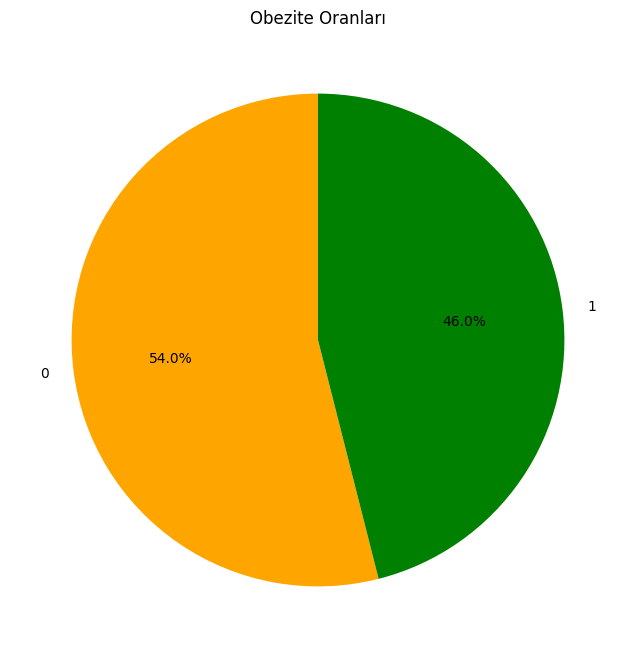

In [19]:
# Obezite oranlarını hesapla
obesity_counts = df['NObeyesdad'].value_counts()

# Pasta grafiği çizimi
plt.figure(figsize=(8, 8))
plt.pie(obesity_counts, labels=obesity_counts.index, autopct='%1.1f%%', startangle=90, colors=['orange','green'])
plt.title('Obezite Oranları')
plt.show()

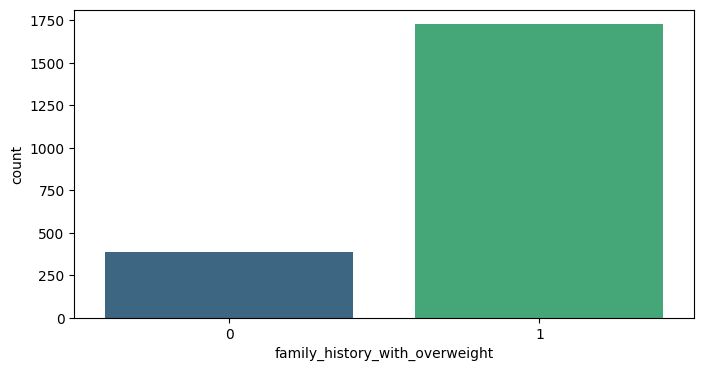

In [18]:
# family_history_with_overweight

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["family_history_with_overweight"], palette="viridis")
plt.show()

NameError: name 'label_plot' is not defined

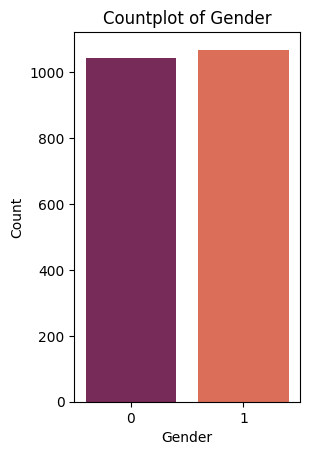

In [21]:

plt.subplot(1, 2, 2)
gender_plot = sns.countplot(x='Gender', data=df, palette='rocket')
plt.title('Countplot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.legend(title='Categories', handles=[label_plot.patches[0], gender_plot.patches[0]],
           labels=['NObeyesdad', 'Gender'], loc='upper right', bbox_to_anchor=(1.28, 1))

plt.tight_layout()
plt.show()

Cinsiyet değişkeninin dengeli olduğunu söyleyebiliriz.

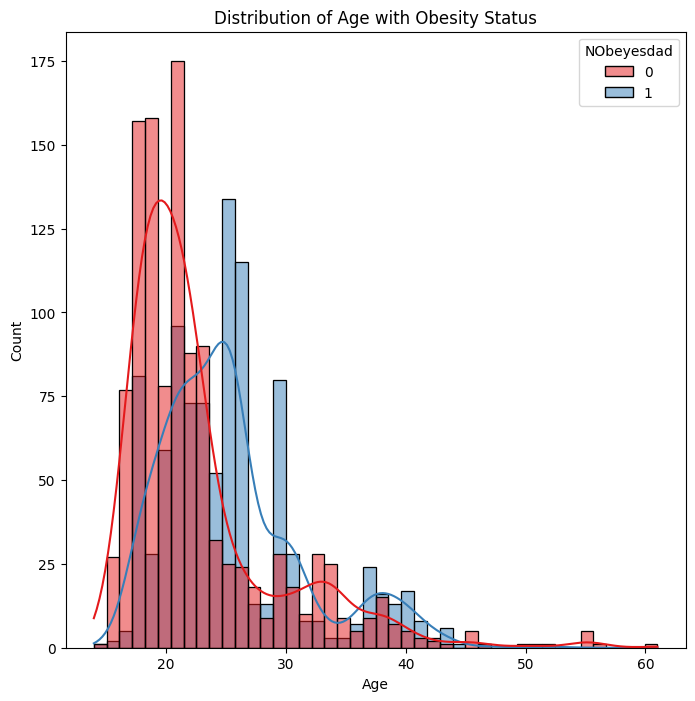

In [20]:
plt.figure(figsize=(8, 8))
sns.histplot(data=df, x='Age', hue='NObeyesdad', kde=True, palette='Set1')
plt.title('Distribution of Age with Obesity Status')
plt.show()

Çoğu yaş 19 ila 25 arasındadır.

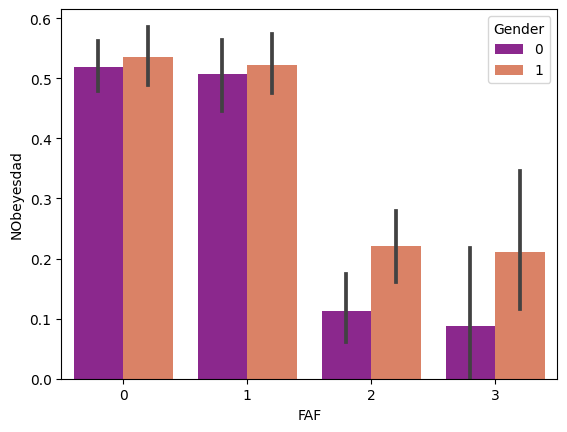

In [64]:
ax = sns.barplot(x='FAF', y='NObeyesdad', hue='Gender', data=df, palette='plasma')


In [ ]:
Fiziksel aktivite bakımından en hareketsiz grubta dengeli bir durum olduğunu söyleyebiliriz.
Fiziksel hareketin fazla olduğu kısımda erkeklerin daha fazla olduğunu söylenebilir.

# Family history, FAVC, SMOKE, SCC VS Gender.

C:\Users\victus\AppData\Local\Temp\ipykernel_3784\919421932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yes_no["NObeyesdad"] = df["NObeyesdad"]


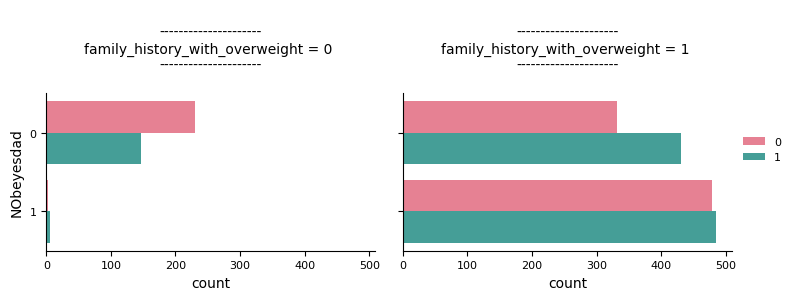

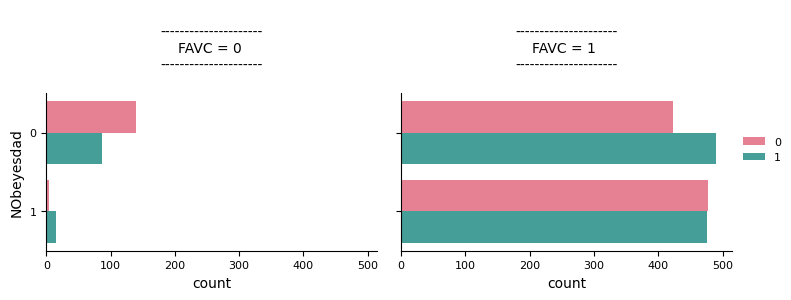

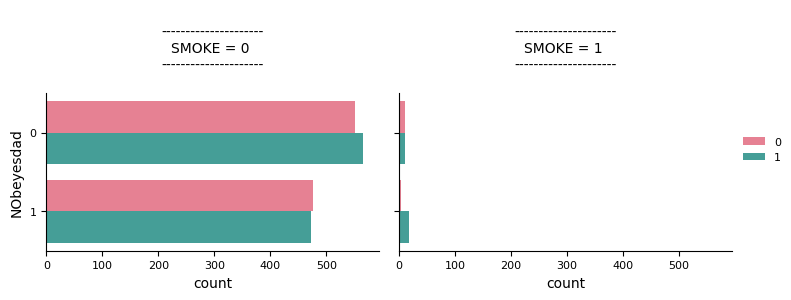

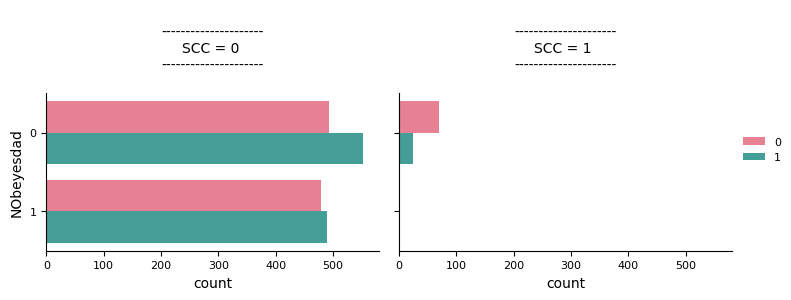

In [40]:
df_yes_no = df.loc[:, df.nunique() == 2]
df_yes_no["NObeyesdad"] = df["NObeyesdad"]
df_yes_no = df_yes_no.columns

for i in df_yes_no[1:5]:
    test = df["Gender"].value_counts()[1]
    g = sns.FacetGrid(data= df, col=i, height=2.5, aspect=1.5)
    g.map_dataframe(
        sns.countplot,
        y="NObeyesdad",
        hue="Gender",
        palette='husl'
    )
    g.set_titles(
        col_template="\n---------------------\n{col_var} = {col_name} \n---------------------\n"
    )
    g.add_legend(fontsize=8)
    g.tick_params(labelsize=8)

- Aşırı kilolu aile öyküsü:
    * HAYIR:
       Erkekler ve kadınlar için hemen hemen aynı; ancak Dişi, Erkekten daha fazla "Yetersiz_Ağırlık" veri noktasına sahip olma eğilimindedir.
    *EVET:
     Erkeklerin değeri kadınlardan daha yüksektir.

- Yüksek kalorili yiyeceklerin sık tüketimi, FAVC:

  *HAYIR:
Dişi, Erkeklerden daha fazla "Yetersiz_Ağırlık" veri noktasına sahiptir.

- Sigara içmek, SMOKE:

  * Katılımcıların büyük çoğunluğu **SİGARA İÇMİYOR**.
      
- Kalori tüketimi izleme SCC:

    Katılımcıların büyük çoğunluğu kalori alımlarını takip etmiyor. Ancak kadınlar kalori alımlarını erkeklere göre daha fazla takip ediyor.

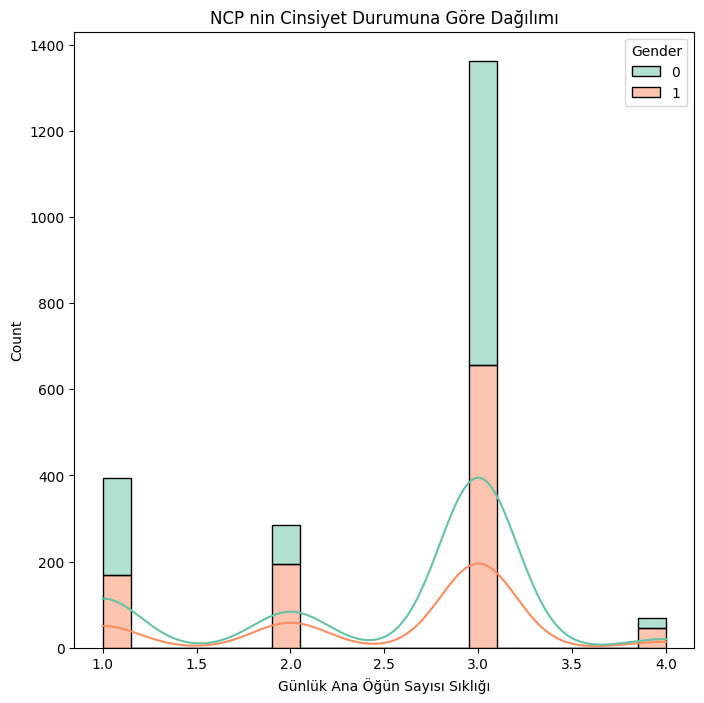

In [50]:
plt.figure(figsize=(8, 8))
sns.histplot(data=df, x='NCP', hue='Gender', kde=True, palette='Set2', multiple='stack')
plt.title('NCP nin Cinsiyet Durumuna Göre Dağılımı')
plt.xlabel('Günlük Ana Öğün Sayısı Sıklığı')
plt.ylabel('Count')
plt.show()

Cinsiyete göre günlük ana öğün sayısında 3 ten fazla öğün yiyenlerin çoğunluğu kadınlardan oluştuğu gözlenmektedir.

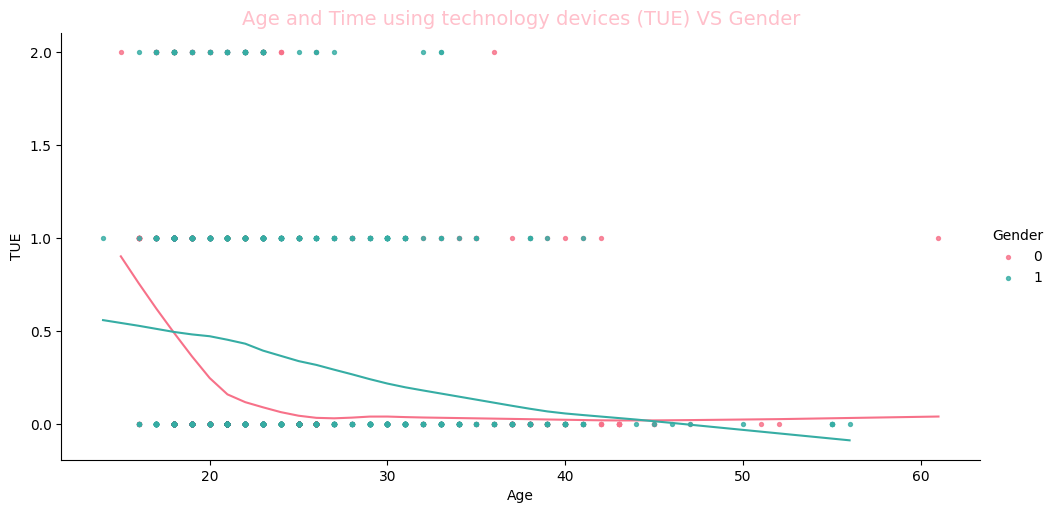

In [32]:
sns.lmplot(
    data=df,
    x="Age",
    y="TUE",
    lowess=True,
    height=5,
    aspect=2,
    hue="Gender",
    palette="husl",  # Otomatik renk paleti
    scatter_kws={"s": 8},
    line_kws={"linewidth": 1.5},
)
plt.title(
    "Age and Time using technology devices (TUE) VS Gender",
    fontsize=14,
    color="pink",
)
plt.show()

Öncelikle bu veri seti TUE yi PC, cep telefonu, tablet vb. gibi kategorilere ayırmamaktadır.
Hem kadınlar hem de erkekler TUE'ye karşı aynı davranışı gösteriyor.
Erkek veri noktalarının kadın veri noktalarına göre daha dağınık olduğunu görebiliriz.
Kadın veri noktaları çoğunlukla 19 ila 25 yaşları arasında gruplandırılmıştır.

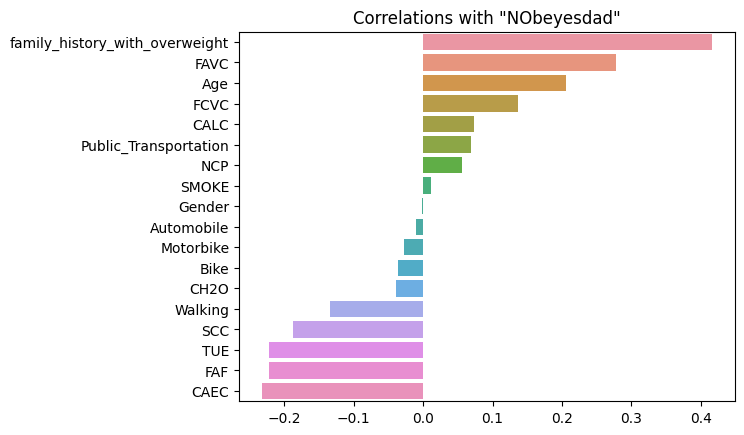

In [97]:
# Correlations with "NObeyesdad"

limit = -1.0

data = df.corr()["NObeyesdad"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "NObeyesdad"')
plt.show()

Bu grafik, "NObeyesdad" ile en güçlü ilişkisi olan sütunları ve bu ilişkinin yönünü (olumlu veya olumsuz) gösterir. Eğer grafikteki çubuklar yüksekse, o sütun "NObeyesdad" ile yüksek bir korelasyona sahiptir. Eğer çubuklar düşükse, bu sütunlar arasındaki korelasyon zayıftır.

In [23]:
df = pd.DataFrame(data)

# Her bir ulaşım türünün toplam sayısını hesapla
total_counts = df[['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']].sum()

# Pasta grafiğini oluştur
fig = px.pie(
    names=total_counts.index,
    values=total_counts.values,
    title='Distribution of Transportation Modes for Obesity Status',
    labels={'index': 'Transportation Mode', 'value': 'Count'},
    color_discrete_sequence=px.colors.qualitative.Set3,
    hole=0.3,
    height=500
)

# Grafiği göster
fig.show()

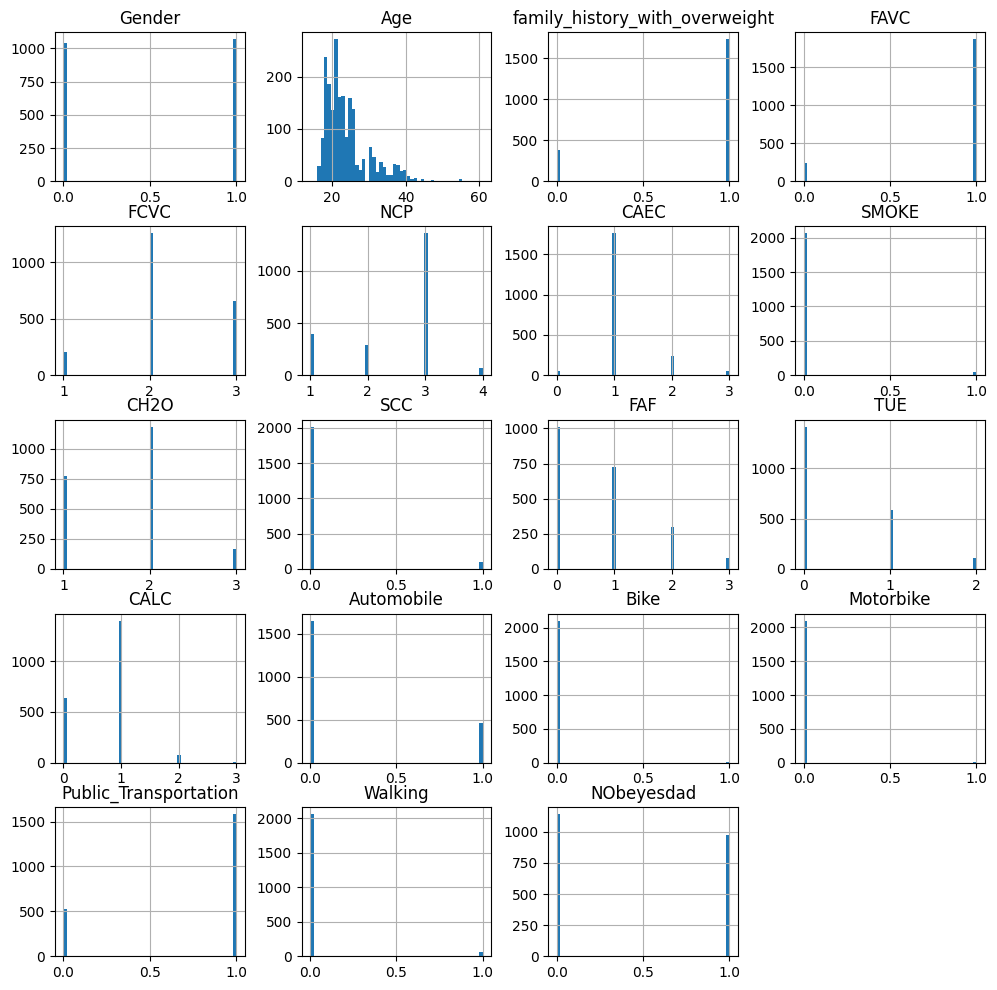

In [25]:
# Histogram Dataset

df.hist(bins=50, figsize=(12,12))
plt.show()

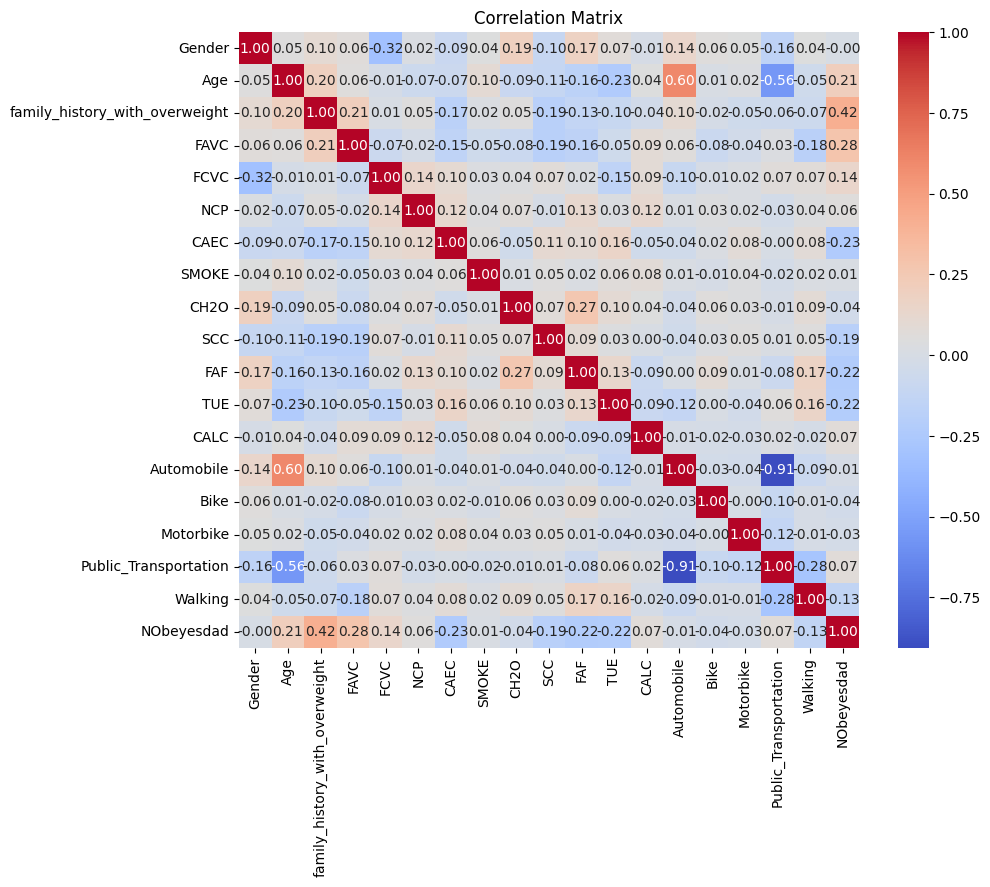

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
df.corr()[['NObeyesdad']]

,NObeyesdad
Gender,-0.001436
Age,0.205189
family_history_with_overweight,0.416607
FAVC,0.278355
FCVC,0.136075
NCP,0.056340
CAEC,-0.232819
SMOKE,0.011578
CH2O,-0.038913
SCC,-0.187952


Yaş, aile geçmişi ve yüksek kalorili yiyecek tüketiminin ilişkili olduğunu söyleyebilirim.

# Bağımlı ve Bağımsız Değişkenlerin Belirlenmesi

In [75]:
X = df[['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']].values

In [76]:
X[0:5]

array([[ 0, 21,  1,  0,  2,  3,  1,  0,  2,  0,  0,  1,  0,  0,  0,  0,
         1,  0],
       [ 0, 21,  1,  0,  3,  3,  1,  1,  3,  1,  3,  0,  1,  0,  0,  0,
         1,  0],
       [ 1, 23,  1,  0,  2,  3,  1,  0,  2,  0,  2,  1,  2,  0,  0,  0,
         1,  0],
       [ 1, 27,  0,  0,  3,  3,  1,  0,  2,  0,  2,  0,  2,  0,  0,  0,
         0,  1],
       [ 1, 22,  0,  0,  2,  1,  1,  0,  2,  0,  0,  0,  1,  0,  0,  0,
         1,  0]], dtype=int64)

In [77]:
y = df['NObeyesdad'].values

In [78]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

# NORMALİZE

In [79]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [75]:
X[0:5]

array([[-1.01191369, -0.47129298,  0.47229133, -2.75976929, -0.35572356,
         0.57409488, -0.30034556, -0.14590027,  0.48034239, -0.21827203,
        -0.88242846,  1.0622704 , -1.4191716 , -0.52564235, -0.05768012,
        -0.07237469,  0.57972058, -0.16507758],
       [-1.01191369, -0.47129298,  0.47229133, -2.75976929,  1.31301517,
         0.57409488, -0.30034556,  6.85399684,  2.15085771,  4.581439  ,
         2.72067885, -0.65476851,  0.52115952, -0.52564235, -0.05768012,
        -0.07237469,  0.57972058, -0.16507758],
       [ 0.98822657, -0.15419354,  0.47229133, -2.75976929, -0.35572356,
         0.57409488, -0.30034556, -0.14590027,  0.48034239, -0.21827203,
         1.51964308,  1.0622704 ,  2.46149063, -0.52564235, -0.05768012,
        -0.07237469,  0.57972058, -0.16507758],
       [ 0.98822657,  0.48000533, -2.11733722, -2.75976929,  1.31301517,
         0.57409488, -0.30034556, -0.14590027,  0.48034239, -0.21827203,
         1.51964308, -0.65476851,  2.46149063, -0.525

# Train/test split

In [80]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (1688, 18) (1688,)
Test set: (423, 18) (423,)


In [78]:
X = df.drop('NObeyesdad', axis=1)  # Bağımsız değişkenler
y = df['NObeyesdad']  # Bağımlı değişken

# Veriyi train ve test setlere ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol etmek için yazdırma
print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)
print("Eğitim etiketleri boyutu:", y_train.shape)
print("Test etiketleri boyutu:", y_test.shape)

Eğitim verisi boyutu: (1688, 18)
Test verisi boyutu: (423, 18)
Eğitim etiketleri boyutu: (1688,)
Test etiketleri boyutu: (423,)


# Classification

In [79]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neighbors = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)


# Prediction

In [80]:
y_predic = neighbors.predict(X_test)

In [81]:
y_predic[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

# Evolution Metrics

In [82]:
# 'NObeyesdad' hedef değişkenimiz olsun
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik regresyon modelini oluşturalım
model = LogisticRegression()

# Modeli eğitim verisiyle uyumlaştıralım
model.fit(X_train, y_train)

# Test setinde tahminler yapalım
y_pred = model.predict(X_test)

# Hata metriklerini hesaplayalım
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Sonuçları gösterelim
print(f'Ortalama Kare Hatası (MSE): {mse}')
print(f'Ortalama Mutlak Hata (MAE): {mae}')
print(f'Kök Ortalama Kare Hatası (RMSE): {rmse}')

Ortalama Kare Hatası (MSE): 0.2127659574468085
Ortalama Mutlak Hata (MAE): 0.2127659574468085
Kök Ortalama Kare Hatası (RMSE): 0.46126560401444255


C:\Users\victus\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# K-nn Model

In [93]:

# Modeli oluşturup eğitme
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = knn_model.predict(X_test)

# Modelin performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Test seti doğruluğu: {accuracy}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Test seti doğruluğu: 0.9030732860520094

Confusion Matrix:
 [[204  20]
 [ 21 178]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       224
           1       0.90      0.89      0.90       199

    accuracy                           0.90       423
   macro avg       0.90      0.90      0.90       423
weighted avg       0.90      0.90      0.90       423



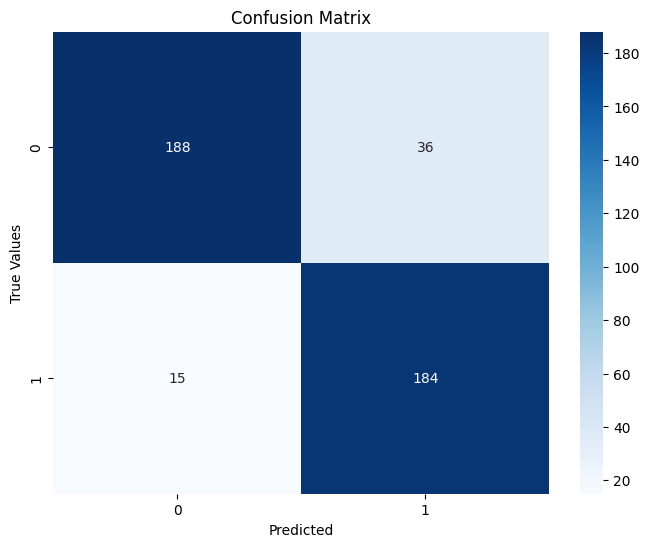

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a model using KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

- Obezite Olmayanlar (Actual 0):

  True Negative (TN): 188
  False Positive (FP): 36
  Toplam Sayı: 188 + 36 = 224

- Obezite Olanlar (Actual 1):

  True Positive (TP): 184
  False Negative (FN): 15
  Toplam Sayı: 184 + 15 = 199

# Random Forest Model

In [82]:
# Random Forest modelini oluşturalım ve eğitelim
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
# Eğitilen modeli kullanarak tahminler yapalım
y_pred = rfc.predict(X_test)

# modelin performansını değerlendirelim
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9290780141843972
Confusion Matrix:
[[212  12]
 [ 18 181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       224
           1       0.94      0.91      0.92       199

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



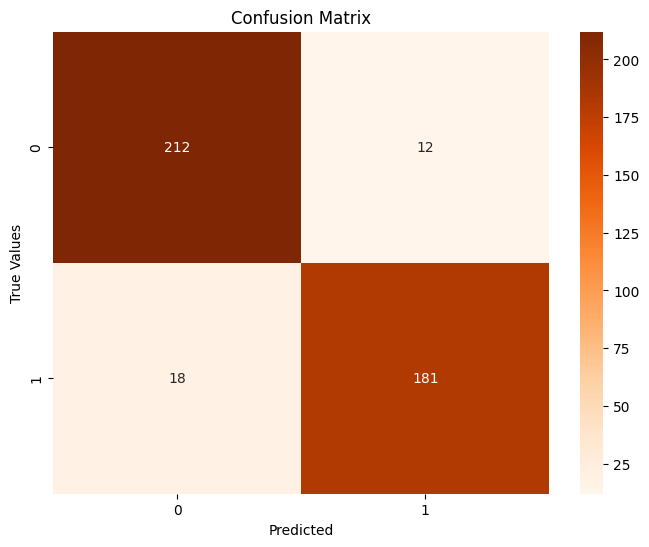

In [91]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Get predictions
y_pred = rfc.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=rfc.classes_, yticklabels=rfc.classes_)
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

212 TN sayısını veriyor. Yani obezite olmayan birey saysısıdır.
12 FP sağlıklı olarak görülen ama olamayanlar.
18 FN yani aslında obezite ama biz sağlıklı diyoruz.
181 TP obezite olanların sayısı

- Obezite Olmayanlar (Actual 0):

True Negative (TN): 212
False Positive (FP): 12
Toplam Sayı: 212 + 12 = 224

- Obezite Olanlar (Actual 1):

True Positive (TP): 181
False Negative (FN): 18
Toplam Sayı: 181 + 18 = 199

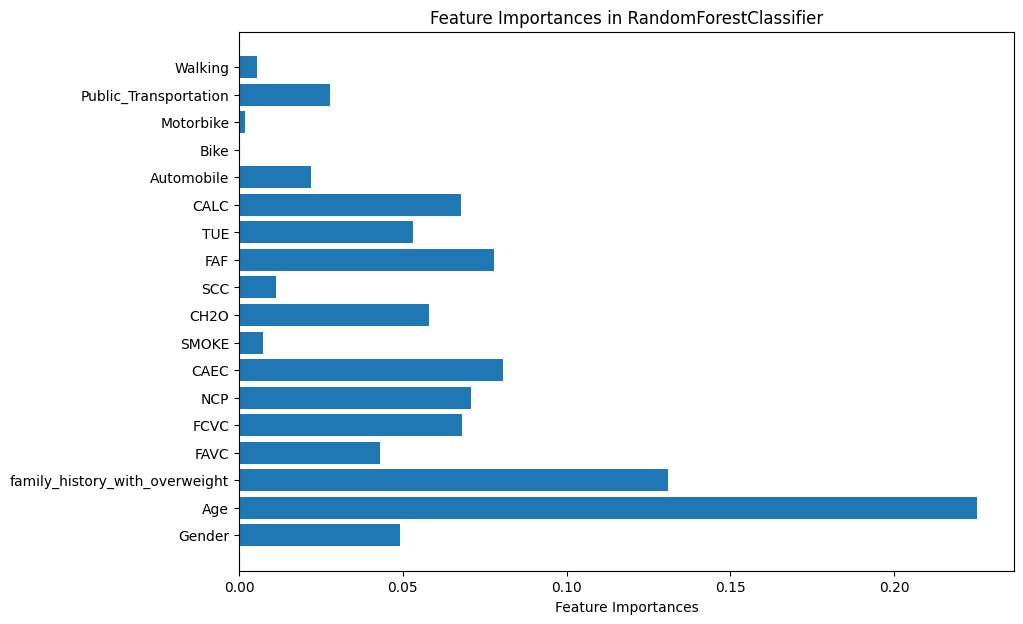

In [86]:
# Feature Importances in Random Forest

feature_names = rfc.feature_names_in_
feature_importances = rfc.feature_importances_

f, ax = plt.subplots(figsize=(10, 7))
ax.barh(range(len(feature_importances)), feature_importances)
ax.set_yticks(range(len(feature_importances)))
ax.set_yticklabels(feature_names)
ax.set_title("Feature Importances in RandomForestClassifier")
ax.set_xlabel("Feature Importances")
plt.show()

# SVM Model

In [53]:
# Veriyi özellikler (features) ve hedef değişken olarak ayıralım
X = df[['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']]
y = df['NObeyesdad']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# SVM modelini oluşturun ve eğitin
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = model.predict(X_test)

In [55]:
# Modelin performansını değerlendirin
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7186761229314421
Confusion Matrix:
[[168  56]
 [ 63 136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       224
           1       0.71      0.68      0.70       199

    accuracy                           0.72       423
   macro avg       0.72      0.72      0.72       423
weighted avg       0.72      0.72      0.72       423



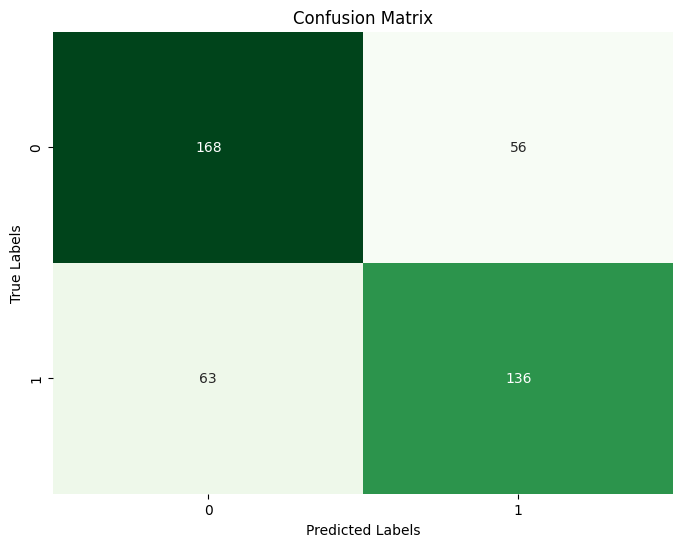

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Logistic Regression

In [57]:
# Logistic Regression modelini oluşturma
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train, y_train)

In [58]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [59]:
# probabilities of predictions
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.80741456, 0.19258544],
       [0.35284094, 0.64715906],
       [0.64677989, 0.35322011],
       [0.62430269, 0.37569731],
       [0.7232569 , 0.2767431 ]])

In [60]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi standardize etme (isteğe bağlı)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression modelini oluşturma
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
# Modelin performansını değerlendirme
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[174  50]
 [ 38 161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       224
           1       0.76      0.81      0.79       199

    accuracy                           0.79       423
   macro avg       0.79      0.79      0.79       423
weighted avg       0.79      0.79      0.79       423

Accuracy: 0.7919621749408984


In [61]:
# jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

0.6063829787234043

In [62]:
# Log loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5748757873095468

In [63]:
# F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       224
           1       0.73      0.71      0.72       199

    accuracy                           0.74       423
   macro avg       0.74      0.74      0.74       423
weighted avg       0.74      0.74      0.74       423



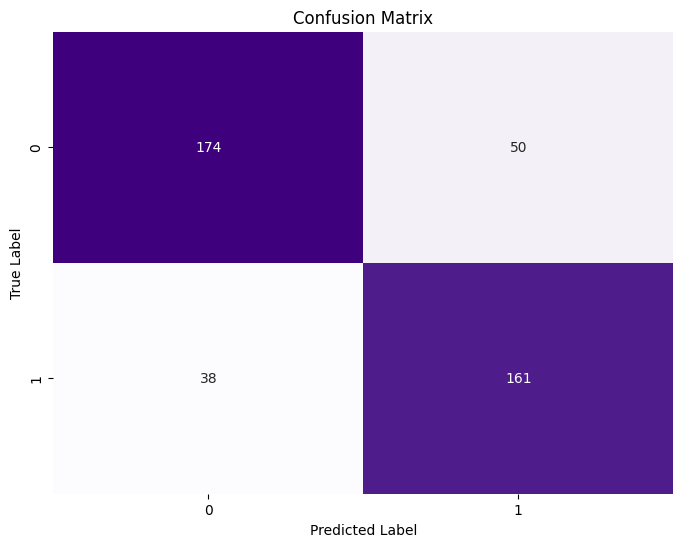

In [64]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Basit bir heatmap kullanarak confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Tree

In [65]:

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree modelini oluşturun ve eğitin
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = dtc.predict(X_test)

# Accuracy değerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)

print(f'Decision Tree Model Accuracy: {accuracy}')

Decision Tree Model Accuracy: 0.9054373522458629


In [66]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[205  19]
 [ 21 178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       224
           1       0.90      0.89      0.90       199

    accuracy                           0.91       423
   macro avg       0.91      0.90      0.91       423
weighted avg       0.91      0.91      0.91       423



In [67]:
jaccard_similarity = jaccard_score(y_test, y_pred, average='micro')  # 'micro' kullanılabilir
print(f'Jaccard Similarity Score: {jaccard_similarity}')

# Log loss değerini hesaplayın
# (Not: Log loss, olasılık tahminleriyle çalışır, bu nedenle decision function veya predict_proba kullanılmalıdır)
y_pred_proba = dtc.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {logloss}')

Jaccard Similarity Score: 0.8272138228941684
Log Loss: 3.248784463582679


In [135]:
print("Ağacın bölünmelerinde kullanılan özellik sayısı:", dtc.tree_.n_features)

Ağacın bölünmelerinde kullanılan özellik sayısı: 18


In [133]:
feature_importances = dtc.feature_importances_
sorted(zip(feature_importances, selected_features), reverse=True)

[(0.17064675187802775, 'FAF'),
 (0.16083316234822523, 'FAVC'),
 (0.1512121490745005, 'family_history_with_overweight'),
 (0.0911768348465561, 'TUE'),
 (0.06637574445496545, 'CAEC'),
 (0.04785885028805323, 'NCP'),
 (0.03406090782542118, 'SMOKE'),
 (0.005260288048354911, 'CALC')]

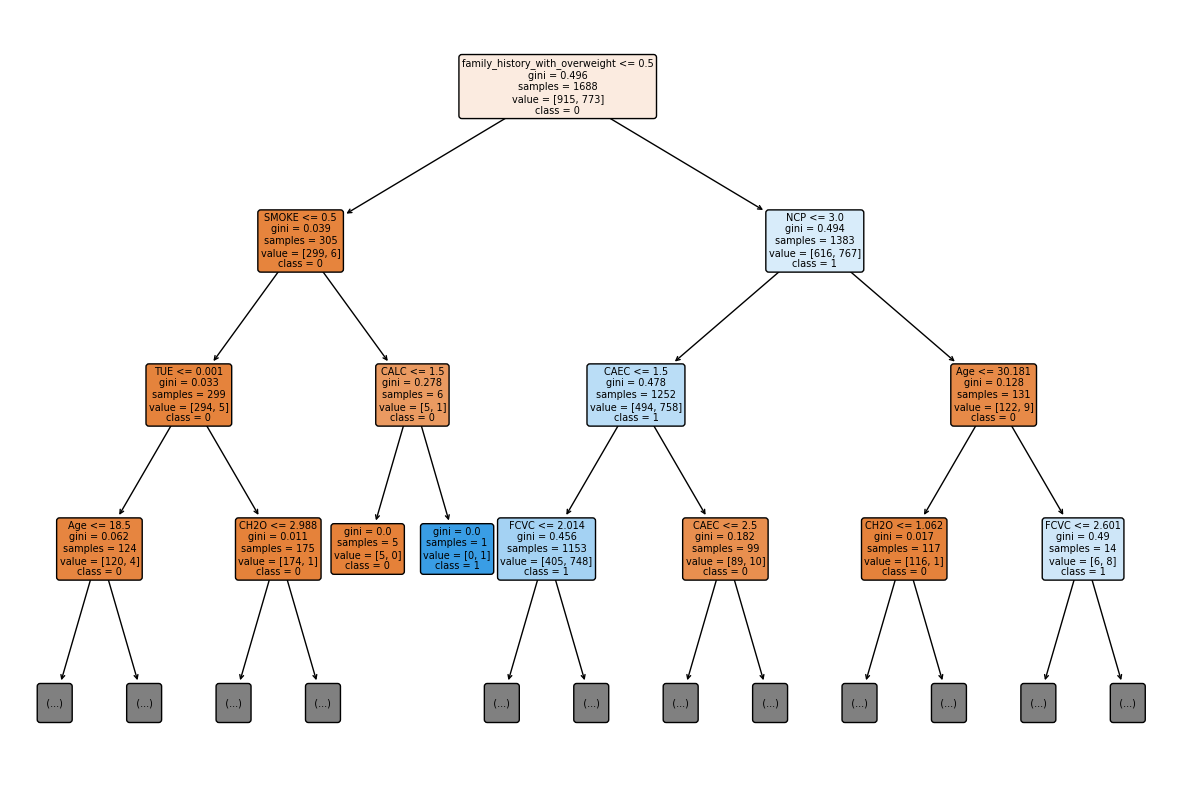

In [140]:
plt.figure(figsize=(15, 10))
plot_tree(dtc, feature_names=X.columns, class_names=list(map(str, dtc.classes_)),
filled=True, rounded=True, fontsize=7, max_depth=3)  # Max depth değeri ayarlayarak sınırlı bir ağaç oluşturabilirsiniz
plt.show()

In [40]:
# Örnek accuracy ve recall değerleri
model_1 = {'Model': 'Random Forest', 'Accuracy': 0.93, 'Recall': 0.93, 'F1-score':0.93, 'Precision':0.93}
model_2 = {'Model': 'SVM', 'Accuracy': 0.71, 'Recall': 0.72, 'F1-score':0.72, 'Precision':0.72}
model_3 = {'Model': 'Logistic Regression', 'Accuracy': 0.79, 'Recall': 0.79, 'F1-score':0.79, 'Precision':0.79}
model_4 = {'Model': 'Decision Tree', 'Accuracy': 0.91, 'Recall': 0.90, 'F1-score':0.91  , 'Precision':0.91}
# Liste oluşturma
models = [model_1, model_2, model_3, model_4]

# Liste üzerinden bir DataFrame oluşturma
df = pd.DataFrame(models)

# DataFrame'i gösterme
print(df)

                 Model  Accuracy  Recall  F1-score  Precision
0        Random Forest      0.93    0.93      0.93       0.93
1                  SVM      0.71    0.72      0.72       0.72
2  Logistic Regression      0.79    0.79      0.79       0.79
3        Decision Tree      0.91    0.90      0.91       0.91


                 Model  Accuracy  Recall  F1-score  Precision
0        Random Forest      0.93    0.93      0.93       0.93
3        Decision Tree      0.91    0.90      0.91       0.91
2  Logistic Regression      0.79    0.79      0.79       0.79
1                  SVM      0.71    0.72      0.72       0.72


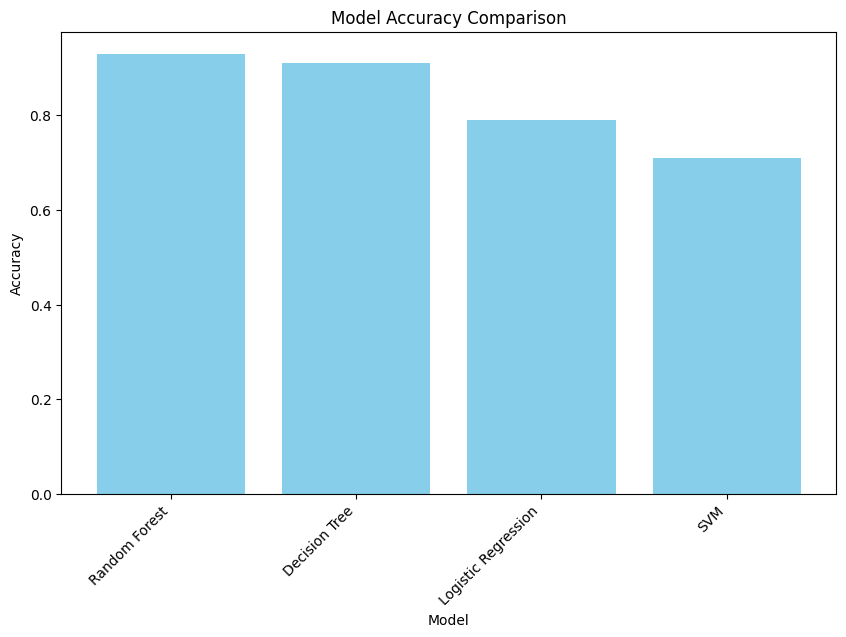

In [41]:
# Liste oluşturma
models = [model_1, model_2, model_3, model_4]

# Liste üzerinden bir DataFrame oluşturma
df = pd.DataFrame(models)

# DataFrame'i accuracy değerine göre sıralama
df_sorted = df.sort_values(by='Accuracy', ascending=False)

# Sıralanmış DataFrame'i ekrana yazdırma
print(df_sorted)

# Histogram grafiğini çizme
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Model'], df_sorted['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

                 Model  Accuracy  Recall  F1-score  Precision
0        Random Forest      0.93    0.93      0.93       0.93
3        Decision Tree      0.91    0.90      0.91       0.91
2  Logistic Regression      0.79    0.79      0.79       0.79
1                  SVM      0.71    0.72      0.72       0.72


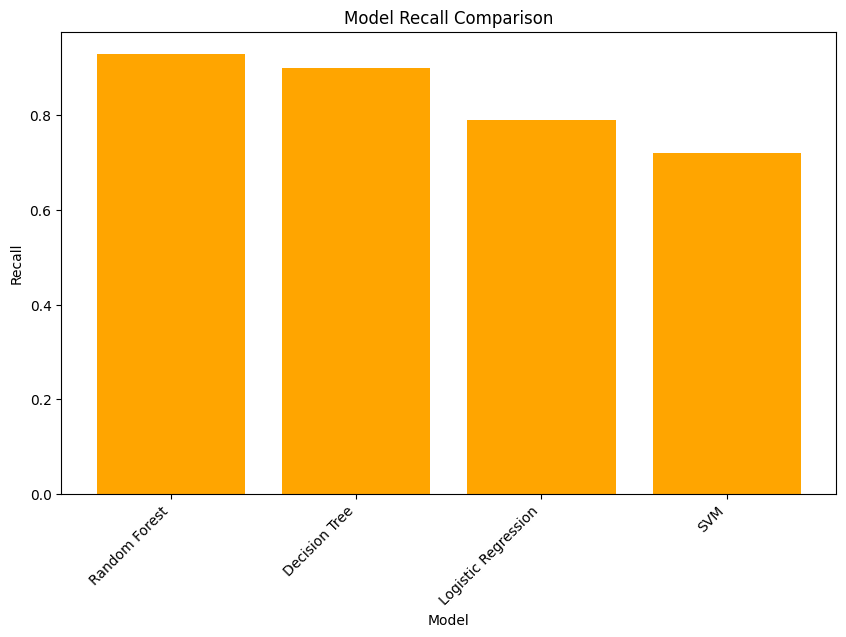

In [42]:
# Liste oluşturma
models = [model_1, model_2, model_3, model_4]

# Liste üzerinden bir DataFrame oluşturma
df = pd.DataFrame(models)

# DataFrame'i accuracy değerine göre sıralama
df_sorted = df.sort_values(by='Recall', ascending=False)

# Sıralanmış DataFrame'i ekrana yazdırma
print(df_sorted)

# Histogram grafiğini çizme
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Model'], df_sorted['Recall'], color='orange')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Recall Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()